# 🤖 Notebook 08: Model Training (Baseline)

**Autor:** Gian  
**Fecha:** 2026-01-19  
**Objetivo:** Entrenar múltiples modelos de Machine Learning con configuración *default* para establecer una línea base de rendimiento. Compararemos Logistic Regression, Random Forest y XGBoost.

---

## 📋 Contenido

1. Configuración del entorno
2. Carga de datos (Dataset Seleccionado)
3. Split Train/Test
4. Definición de Modelos
5. Entrenamiento y Evaluación (Loop)
6. Comparación de Resultados
7. Conclusiones y Próximos Pasos

---
## 1. Configuración del Entorno

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier # Comentado temporalmente por error de dependencias en Mac (libomp)

# Metricas y utilidades
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

np.random.seed(42)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


---
## 2. Carga de Datos
Cargamos `07_data_selected.csv` del paso anterior (Feature Selection).

In [10]:
# Rutas
OUTPUT_PATH = Path("../../outputs/gian")
DATA_PATH = OUTPUT_PATH / "data" / "07_data_selected.csv"
MODELS_PATH = OUTPUT_PATH / "models"
MODELS_PATH.mkdir(parents=True, exist_ok=True)

# Cargar datos
df = pd.read_csv(DATA_PATH)

print(f"✅ Dataset cargado: {df.shape[0]:,} registros × {df.shape[1]} columnas")

✅ Dataset cargado: 9,701 registros × 26 columnas


---
## 3. Split Train/Test
Dividimos los datos en 80% entrenamiento y 20% prueba. Usamos `stratify` para mantener la proporción de churn.

In [11]:
X = df.drop(columns=['cancelacion', 'cliente_id'])
y = df['cancelacion']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"📊 Training Set: {X_train.shape[0]} muestras")
print(f"📊 Test Set: {X_test.shape[0]} muestras")
print(f"⚖️ Tasa de Churn en Train: {y_train.mean():.1%}")
print(f"⚖️ Tasa de Churn en Test: {y_test.mean():.1%}")

📊 Training Set: 7760 muestras
📊 Test Set: 1941 muestras
⚖️ Tasa de Churn en Train: 15.7%
⚖️ Tasa de Churn en Test: 15.7%


---
## 4. Definición de Modelos
Vamos a probar 4 modelos con hiperparámetros por defecto.

In [12]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    # "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss') # Requiere libomp en Mac
}

---
## 5. Entrenamiento y Evaluación
Iteramos sobre el diccionario de modelos, entrenamos y evaluamos.

In [13]:
results = []

print("🚀 Iniciando entrenamiento de modelos baseline...\n")

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": auc
    })
    
print("\n✅ Entrenamiento completado.")

🚀 Iniciando entrenamiento de modelos baseline...

Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...

✅ Entrenamiento completado.


---
## 6. Comparación de Resultados
Visualizamos qué modelo tuvo mejor desempeño.

🏆 Resultados Baseline (Ordenados por AUC):


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest,0.951056,0.843137,0.845902,0.844517,0.931702
2,Gradient Boosting,0.951056,0.843137,0.845902,0.844517,0.928529
0,Logistic Regression,0.950026,0.839869,0.842623,0.841244,0.907926


📊 Gráfico guardado en: ../../outputs/gian/figures/08_baseline_comparison.png


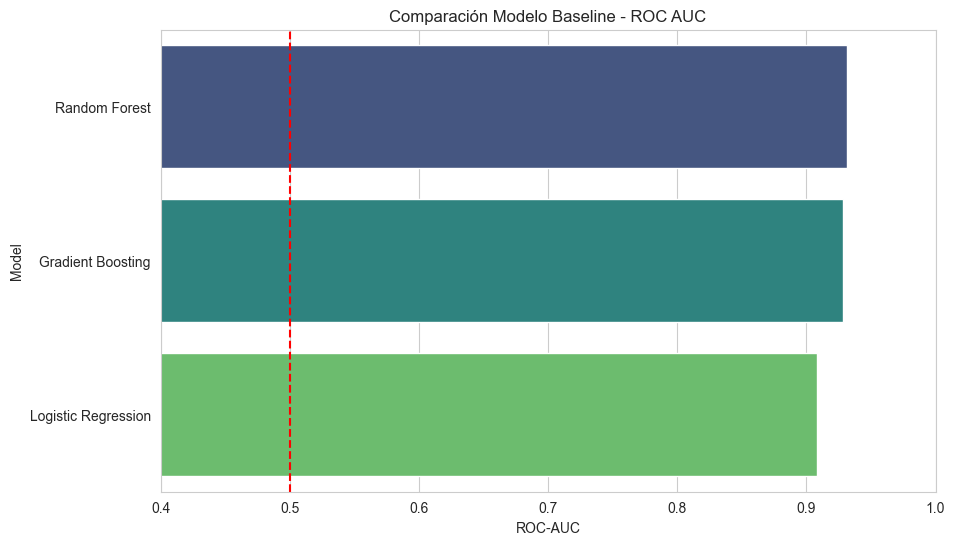

In [14]:
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)

# Guardar resultados
results_df.to_csv(MODELS_PATH / "baseline_results.csv", index=False)

print("🏆 Resultados Baseline (Ordenados por AUC):")
display(results_df)

# Gráfico simple
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="ROC-AUC", y="Model", palette="viridis")
plt.title("Comparación Modelo Baseline - ROC AUC")
plt.axvline(0.5, color='r', linestyle='--')
plt.xlim(0.4, 1.0)

# Guardar figura
FIGURES_PATH = OUTPUT_PATH / "figures"
FIGURES_PATH.mkdir(parents=True, exist_ok=True)
plt.savefig(FIGURES_PATH / "08_baseline_comparison.png", dpi=300, bbox_inches='tight')
print(f"📊 Gráfico guardado en: {FIGURES_PATH}/08_baseline_comparison.png")

plt.show()

---
## 7. Conclusiones y Próximos Pasos
- El modelo con mayor AUC será seleccionado para Hyperparameter Tuning.
- Si Random Forest o XGBoost ganan, confirma que la no-linealidad es clave.
- Si Logistic Regression está muy cerca, quizás un modelo simple baste.